# 0. Preparation (API call, data sorting & re-indexing)

In [52]:
import pandas as pd
from sodapy import Socrata

client = Socrata("data.cms.gov", None)

# All results, returned as JSON from API / converted to Python list of dictionaries by sodapy.
results = client.get("s2uc-8wxp", limit=999999)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [96]:
# Assign the original data to a variable for future manipulation
df = results_df

In [97]:
# Extract NY state data
df = df[df["provider_state"] == "NY"]

In [98]:
# Convert week_ending's data type to datime
df["week_ending"] = df["week_ending"].astype("datetime64")
# Sort the data by time
df.sort_values(by = "week_ending")

<ipython-input-98-dc4aee60a6a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["week_ending"] = df["week_ending"].astype("datetime64")


,week_ending,federal_provider_number,provider_name,provider_address,provider_city,provider_state,provider_zip_code,submitted_data,county,geolocation,...,has_facility_performed_staff_and_or_personnel_tests_since_last_report,tested_staff_and_or_personnel_with_new_signs_or_symptoms,tested_asymptomatic_staff_and_or_personnel_in_a_unit_or_section_after_a_new_case,tested_asymptomatic_staff_and_or_personnel_facility_wide_after_a_new_case,tested_asymptomatic_staff_and_or_personnel_without_known_exposure_as_surveillance,tested_another_subgroup_of_staff_and_or_personnel,number_of_ventilators_in,number_of_ventilators_in_1,any_current_supply_of,one_week_supply_of_ventilator
137519,2020-05-24,335677,SHEEPSHEAD NURSING & REHABILITATION CENTER,2840 KNAPP ST,BROOKLYN,NY,11235,Y,Kings,"{'type': 'Point', 'coordinates': [-73.931321, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125278,2020-05-24,335098,FINGER LAKES HEALTH,196-198 NORTH STREET,GENEVA,NY,14456,Y,Ontario,"{'type': 'Point', 'coordinates': [-76.987954, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122965,2020-05-24,335080,REGENCY EXTENDED CARE CENTER,65 ASHBURTON AVENUE,YONKERS,NY,10701,Y,Westchester,"{'type': 'Point', 'coordinates': [-73.894891, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,10,0,Y,Y
134809,2020-05-24,335820,REGAL HEIGHTS REHABILITATION AND HEALTH CARE CTR,70-05 35 AVENUE,JACKSON HEIGHTS,NY,11372,Y,Queens,"{'type': 'Point', 'coordinates': [-73.895441, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142302,2020-05-24,335844,THE KNOLLS,55 GRASSLAND ROAD,VALHALLA,NY,10595,Y,Westchester,"{'type': 'Point', 'coordinates': [-73.816524, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140850,2020-08-30,335618,LATTA ROAD NURSING HOME EAST,2102 LATTA ROAD,ROCHESTER,NY,14612,Y,Monroe,"{'type': 'Point', 'coordinates': [-77.669413, ...",...,Y,N,N,N,Y,N,NaN,NaN,NaN,NaN
140852,2020-08-30,335771,THROGS NECK REHABILITATION & NURSING CENTER,707 THROGS NECK EXPRESSWAY,BRONX,NY,10465,Y,Bronx,"{'type': 'Point', 'coordinates': [-73.818794, ...",...,Y,Y,N,Y,N,N,NaN,NaN,NaN,NaN
128858,2020-08-30,335046,NORTHERN MANOR GERIATRIC CENTER INC,199 N MIDDLETOWN ROAD,NANUET,NY,10954,Y,Rockland,"{'type': 'Point', 'coordinates': [-74.010866, ...",...,Y,N,N,N,Y,N,25,0,Y,Y
140694,2020-08-30,335734,"FRIEDWALD CENTER FOR REHAB AND NURSING, L L C",475 NEW HEMPSTEAD ROAD,NEW CITY,NY,10956,Y,Rockland,"{'type': 'Point', 'coordinates': [-74.029994, ...",...,Y,N,N,N,Y,N,18,0,Y,Y


# 1. Problems with Critical Supplies

## a. Ventilators
### I. How many nursing homes in the state of NY are equipped with ventilators?

<AxesSubplot:title={'center':'Number of Nursing Homes equipped with Ventilators in the state of NY'}, xlabel='Week Ending', ylabel='Number of Nursing Homes'>

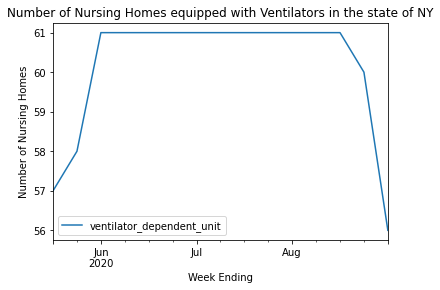

In [114]:
# Pin down the nursing homes with Ventilators
mask1 = df["ventilator_dependent_unit"] == "Y"
# How the number of nursing homes equiped with Ventilators changed in the past few months (in the state of NY)
nursinghome_with_ventilator = df[mask1].pivot_table(values = "ventilator_dependent_unit", index = "week_ending", aggfunc = "count")
# Plot the graph
nursinghome_with_ventilator.plot(title = "Number of Nursing Homes equipped with Ventilators in the state of NY", xlabel = "Week Ending", ylabel = "Number of Nursing Homes")

In [131]:
df["federal_provider_number"].nunique()

617

Below 10% of the nursing homes are equipped with ventilators.

### II. How many ventilators are there? How many patient have to share one?

<ipython-input-112-73f18dfd68d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["number_of_ventilators_in"] = df["number_of_ventilators_in"].fillna(0).astype(float)


<AxesSubplot:title={'center':'Total Number of Ventilators in the state of NY'}, xlabel='Week Ending', ylabel='Number of Ventilators'>

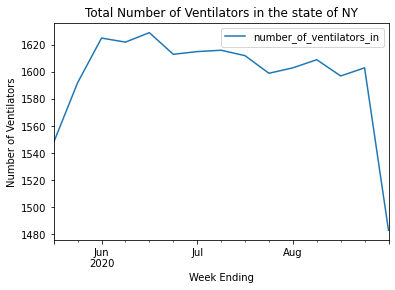

In [112]:
# Find out how the total number of Ventilators in the state of NY has changed 
df["number_of_ventilators_in"] = df["number_of_ventilators_in"].fillna(0).astype(float)
# Construct the Pivot table
ventilator_number = df.pivot_table(values = "number_of_ventilators_in", index = "week_ending", aggfunc = "sum")
# Plot the graph
ventilator_number.plot(title = "Total Number of Ventilators in the state of NY", xlabel = "Week Ending", ylabel = "Number of Ventilators")

In [152]:
# Total number of resident confirmed cases
res_cases = df[df["week_ending"] == "2020-08-30"]["residents_total_confirmed"].fillna(0).astype(float).sum()
res_cases

12974.0

In [153]:
# Total number of staff confirmed cases
staff_cases = df[df["week_ending"] == "2020-08-30"]["staff_total_confirmed_covid"].fillna(0).astype(float).sum()
staff_cases

14336.0

In [155]:
# Total number of resident covid death
res_covid_death = df[df["week_ending"] == "2020-08-30"]["residents_total_covid_19"].fillna(0).astype(float).sum()
res_covid_death

4582.0

In [154]:
# Total number of staff covid death
staff_covid_death = df[df["week_ending"] == "2020-08-30"]["staff_total_covid_19_deaths"].fillna(0).astype(float).sum()
staff_covid_death

54.0

In [156]:
# Existing patients in the state of NY by 2020-08-30
res_cases + staff_cases - res_covid_death - staff_covid_death

22674.0

In [160]:
# Number of patients who need to share one ventilator
22674/1483


15.289278489548213

There are enough ventilators out there. However, not everyone has the same access to them. Some nursing homes have a dozens of ventilators while others have none.

### III. Is there enough follow-up supplies?

<AxesSubplot:xlabel='week_ending'>

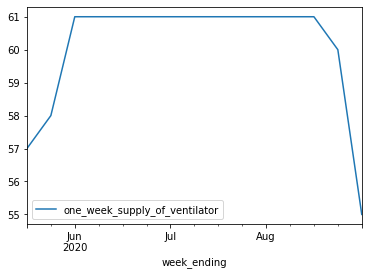

In [107]:
mask2 = df["one_week_supply_of_ventilator"] == "Y"
df[mask2].pivot_table(values = "one_week_supply_of_ventilator", index = "week_ending", aggfunc = "count").plot()

## b. PPEs (N95 masks, Surgical masks, Eye protection, Gowns, Gloves, Hand sanitizer)

# 2. Problem with Staff Infection

In [119]:
# Cleanse Data
df["residents_weekly_admissions"] = df["residents_weekly_admissions"].fillna(0).astype(float)
# Construct pivot table and store it
resident_weekly_admissions = df.pivot_table(values = "residents_weekly_admissions", index = "week_ending", aggfunc = "sum")
resident_weekly_admissions

<ipython-input-119-21ff0dc2d7cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["residents_weekly_admissions"] = df["residents_weekly_admissions"].fillna(0).astype(float)


,residents_weekly_admissions
week_ending,
2020-05-24,4958.0
2020-05-31,552.0
2020-06-07,729.0
2020-06-14,585.0
2020-06-21,515.0
2020-06-28,422.0
2020-07-05,365.0
2020-07-12,281.0
2020-07-19,262.0


In [120]:
# Cleanse data
df["staff_weekly_confirmed_covid"] = df["staff_weekly_confirmed_covid"].fillna(0).astype(float)
# Construct pivot table and store it
staff_weekly_confirmed = df.pivot_table(values = "staff_weekly_confirmed_covid", index = "week_ending", aggfunc = "sum")
staff_weekly_confirmed

<ipython-input-120-418e1a88f2ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["staff_weekly_confirmed_covid"] = df["staff_weekly_confirmed_covid"].fillna(0).astype(float)


,staff_weekly_confirmed_covid
week_ending,
2020-05-24,5061.0
2020-05-31,2185.0
2020-06-07,1708.0
2020-06-14,999.0
2020-06-21,894.0
2020-06-28,763.0
2020-07-05,496.0
2020-07-12,430.0
2020-07-19,356.0


<AxesSubplot:title={'center':'Weekly Staff infections and Weekly Resident Admissions'}, xlabel='Week Ending', ylabel='Number of Cases'>

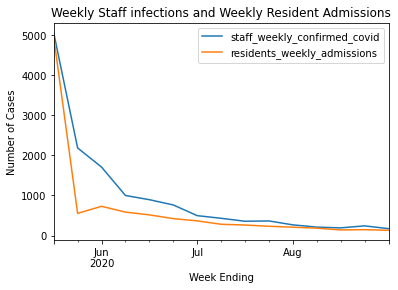

In [128]:
# Combine those DFs and compare
staff_infection = staff_weekly_confirmed.merge(resident_weekly_admissions, how = "inner", on = "week_ending")
staff_infection.plot(title = "Weekly Staff infections and Weekly Resident Admissions", xlabel = "Week Ending", ylabel = "Number of Cases")

<ipython-input-130-112c3abbf2d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["residents_weekly_all_deaths"] = df["residents_weekly_all_deaths"].fillna(0).astype(float)


<AxesSubplot:title={'center':'Weekly Staff infections, Weekly Resident Admissions and Weekly Resident Deaths'}, xlabel='Week Ending', ylabel='Number of Cases'>

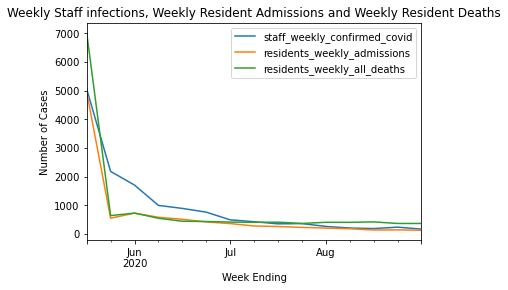

In [130]:
# Take residents' death data into consideration
df["residents_weekly_all_deaths"] = df["residents_weekly_all_deaths"].fillna(0).astype(float)
# Construct pivot table
resident_death = df.pivot_table(values = "residents_weekly_all_deaths", index = "week_ending", aggfunc = "sum")
# Merge it with the previous two
staff_infection.merge(resident_death, how = "inner", on = "week_ending").plot(title = "Weekly Staff infections, Weekly Resident Admissions and Weekly Resident Deaths", xlabel = "Week Ending", ylabel = "Number of Cases")

In fact, staff confirmed cases are even more than resident confirmed cases.

In [147]:
# Total number of resident confirmed cases
df[df["week_ending"] == "2020-08-30"]["residents_total_confirmed"].fillna(0).astype(float).sum()

12974.0

In [148]:
# Total number of staff confirmed cases
df[df["week_ending"] == "2020-08-30"]["staff_total_confirmed_covid"].fillna(0).astype(float).sum()

14336.0